## Polynomial Curve Fitting


- Polynomial Curve Fitting is an example of Regression, a supervised machine learning algorithm.
- __End Goal of Curve Fitting__: We observe a real-valued input variable, $x$, and we intend to predict the target variable, $t$. Polynomial Curve fitting is a generalised term; curve fitting with various input variables, $x$, $y$, and many more.

We will see curve fitting on a synthetic dataset.

For the synthetic datset, we will generate the data points from a function $\text{sin2$\pi$}x$ with some random normal noise included.


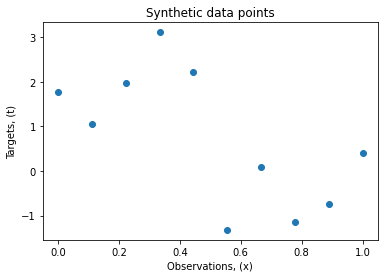

In [44]:
## Imports
import warnings
import numpy as np
import matplotlib.pyplot as plt

## Set a seed
np.random.seed(0)

## Create Synthetic Dataset
x = np.linspace(0.0, 1.0, num=10)
t = (np.sin(2*np.pi*x)) + np.random.normal(0, 1, 10)

txt="Fig 1.1: Scatter plot of the observations with targets"
plt.scatter(x, t)
plt.xlabel("Observations, (x)")
plt.ylabel("Targets, (t)")
plt.title("Synthetic data points")

plt.show()

## In mathematical Notations

$$\text{x} = (x_1, x_2, ..., x_N)^T ==>\text{N observations of x}$$

$$\text{t} = (t_1, t_2, ..., t_N)^T ==>\text{N target variables, each corresponding to the ovservation data points}$$

The scatter plot in the Figure 1.1 possess an underlying regularity which we want to learn. This is an intricate problem since we have finite number of data set with noises embedded.

Now, let's consider a simple approach for curve fitting. Consider a polyomial function of the form:

$$y(x,w) =w_0 + w_1x + w_2x^2+...+w_Mx^M $$

$$ = \sum_{j=1}^{M}w_jx^j$$

where,

M = order of polynomial 

$w_0, w_1, ..., w_M $= polynomial coefficients (denoted by vector, $\text{v}$)

__Remember__: $y(x,w)$ is non linear function of $x$ but the linear function of coefficients, $w$. Functions which are linear in terms of unknown parameters are called linear models.

__Determinine the unknown parameters, $\text{w}$__

Value of the coefficients are found by fitting the polynomial to training dataset. For this, we minimize the error function that calculates the misfit between function $y(x,w)$ and the training data points. One of the widely ised error function is the Sum of the Squares of the Errors (SSE).

$$\text{Sum of the Squares of Errors (SSE} = E(w) = \frac{1}{2}\sum_{n =1}^{N}{[{y(x_n, w) -t_n}]^2}$$

$\frac{1}{2}$ has a convinience, which we will see in later chapters. SSE is a non-negative quantity  and we wish to choose unknown parameters, $\text{w}$ so as to make SSE minimum. The error function is quardatic so its first derivative with respect to coefficients, $\text{w}$ will be a linear equation with $\text{w}$ as unknown. So, we can solve for the unique values of $\text{w}$, which we will denote by $\text{w}^*$ since this set of parameters minimize the error function's value and the resulting curve is given by $y (x, w^*)$. 


__Determinine the order of the polynomial, $\text{M}$__

Now, we need to find $\text{M}$ for the curve. $\text{M}$ is the order of the polynomial and selction of the order of the polynomial comes under a broad topic, _Model Comparison_ or _Model Selection_.


- With $\text{M}=0$

$$y(x, w) = w_0$$

$$\text{E(w)} = .5\sum_{n =1}^{N}[{{w_0 -t_n}]^2}$$



For the elucidation, we will see how the unique value for $\text{w}$ is found out with $\text{M} =0$, since it is easiest among all possible valued of $\text{M}$ to calculate manually. For $\text{M} = 0$, the coefficient(unknown parameter) is denoted by $w_0$, so we wil find $w_0$ now.

The Error function fully expanded seems like:

$$\text{E($w_0$)} = .5*[\ (w_0-1.76405235)^2 + (w_0-1.04294482)^2+ (w_0-1.96354574)^2+ (w_0-3.1069186)^2+ (w_0-2.20957813)^2+ (w_0+1.31929802)^2+ (w_0-0.08406301)^2+ (w_0+1.13616496)^2+ (w_0+0.74600646)^2+ (w_0-0.4105985)^2\ ]$$



In [45]:
from sympy import *

In [46]:
w_0 = Symbol('w_0')
E = .5 * ((w_0 - 1.76405235)**2 + (w_0 - 1.04294482)**2+ (w_0 - 1.96354574)**2+ (w_0 - 3.1069186)**2+ 
        (w_0 - 2.20957813)**2+ (w_0 + 1.31929802)**2+ (w_0 - 0.08406301)**2+ (w_0 + 1.13616496)**2+ 
        (w_0 + 0.74600646)**2+ (w_0 - 0.4105985)**2) 

Now, we compute the first derivative of $\text{E($w_0$)}$ with respect to $w_0$ and solve it for $w_0$. Mathematically:

$$
\frac{\partial E(w_0)}{\partial w_0} = 0
$$

In case, we choose higher $\text{M}$, we would have more more unknown parameters, to state there would be $\text{M+1}$, unknown parameters and we would find all the unknown parameters by simply taking the partial derivative of the error function w.r.t to all the unknown parameters.

In [47]:
## Calculate the partial derivative w.r.t w_0
Eprime = E.diff(w_0)

## See the output
print(Eprime)

10.0*w_0 - 7.38023171


In [48]:
## Solve the linear equation of Eprime by equating to 0.
w_0 = solve(Eprime)
print(w_0)

[0.738023171000000]


So, now this is the value for $w_0$ to minimize the error function. Let's plot this line on the original data points set.

$$
y = 0.739$$

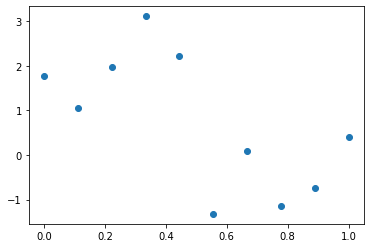

In [49]:
plt.scatter(x, t)
plt.show()

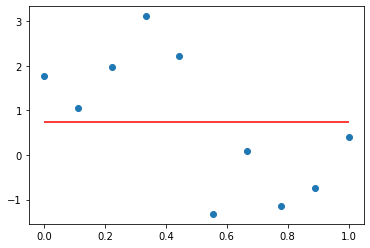

In [50]:
fig, ax = plt.subplots()
ax.scatter(x, t)
ax.hlines(y=0.739, xmin=0, xmax=1,color='r')
plt.show()

Similarly, now we will see the coefficient for other valued of $\text{M}$. We will see for $\text{M} = 1, 3, 9$. For the coefficient calculation, we won't go step by step as we did for $\text{M}=0$. We will use a numpy librbay, numpy.polyfit which performs the least squares polynomial fit with the number of order specified.

In [51]:
## For M =1
coefs = np.polyfit(x, t, 1)
print(coefs)

[-2.87998582  2.17801608]


Now, we will plot the curve with these coefficients.

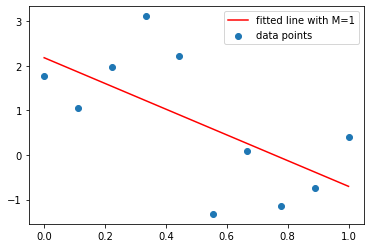

In [52]:
## Fitted Curve
y = coefs[1] + coefs[0]*x 

## Plot the fitted curve
plt.scatter(x, t, label = 'data points')
plt.plot(x, y, c ='r', label ='fitted line with M=1')
plt.legend()
plt.show()

In [53]:
## For M = 3
coefs = np.polyfit(x, t, 3)
print(coefs)

[ 30.12650107 -45.28783042  14.36416336   1.12207597]


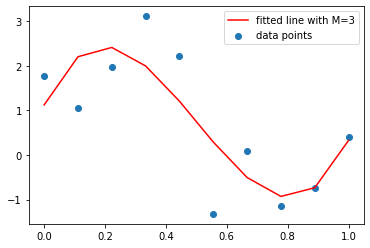

In [54]:
## Fitted Curve
y = coefs[3] + coefs[2]*x + coefs[1]*x**2 + coefs[0]*x**3

## Plot the fitted curve
plt.scatter(x, t, label = 'data points')
plt.plot(x, y, c ='r', label ='fitted line with M=3')
plt.legend()
plt.show()

In [55]:
## For M = 9
coefs = np.polyfit(x, t, 9)
print(coefs)

[-3.07007894e+05  1.34937867e+06 -2.47898606e+06  2.47025924e+06
 -1.44948523e+06  5.08745738e+05 -1.03533067e+05  1.11036868e+04
 -4.76434849e+02  1.76405235e+00]


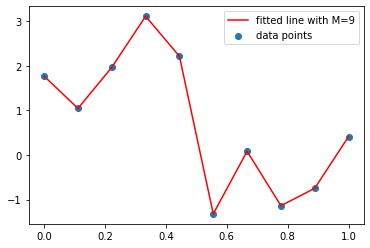

In [56]:
## Fitted Curve
y = coefs[9] + coefs[8]*x + coefs[7]*x**2 + coefs[6]*x**3 + coefs[5]*x**4 + coefs[4]*x**5 + coefs[3]*x**6 + coefs[2]*x**7 + coefs[1]*x**8 + coefs[0]*x**9

## Plot the fitted curve
plt.scatter(x, t, label = 'data points')
plt.plot(x, y, c ='r', label ='fitted line with M=9')
plt.legend()
plt.show()



Now, from the above plots and orders of the polynomial, things are clear to an extent. We see that the order, $\text{M} = 0$ and $\text{M} =1$ fit poorly to the data points. When we opted for the much higher order, i.e., 9 then, the data points are completely captured by the fitted curve. In this case, the error is 0 since the fitted curve passes through each training data points and there are no residuals(errors). However, this fitted curve oscillates heavily and poorly represents the underlying function,  $\text{sin2$\pi$}x$. This behavour is widely popular as Over-fitting.